## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [23]:
%matplotlib inline
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [24]:
train_and_y = np.loadtxt('C:/temp/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('C:/temp/digit/test.csv', delimiter=',', skiprows=1) / 255

In [25]:
# сохраняем разметку в отдельную переменную
train_label = train_and_y[:, 0]
train=train_and_y[:, 1:] /255

In [26]:
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train, (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [31]:
train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [32]:
train.shape

(42000, 784)

In [33]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

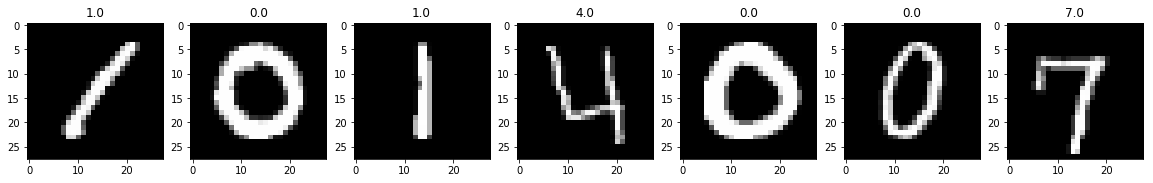

In [34]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:7], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Собираем полносвязную сеть для обучения

In [45]:
model = keras.models.Sequential()
n = train.shape[1]*2
#n=256
model.add(keras.layers.Dense(n, input_dim=train.shape[1], activation='relu'))
model.add(keras.layers.Dense(n, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Выводим информацию о модели

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1568)              1230880   
_________________________________________________________________
dense_5 (Dense)              (None, 1568)              2460192   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                15690     
Total params: 3,706,762
Trainable params: 3,706,762
Non-trainable params: 0
_________________________________________________________________


## One hot encoding разметки

In [47]:
from keras.utils import np_utils
y_train_labels = np_utils.to_categorical(train_label)
print( train_label.shape, y_train_labels.shape, train.shape)

(42000,) (42000, 10) (42000, 784)


## Запускаем обучение

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
model.fit(train, y_train_labels, batch_size=840, epochs=15, validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/15
37800/37800 [==============================] - 29s - loss: 0.3945 - acc: 0.8828 - val_loss: 0.1630 - val_acc: 0.9519
Epoch 2/15
37800/37800 [==============================] - 27s - loss: 0.1187 - acc: 0.9653 - val_loss: 0.1200 - val_acc: 0.9617
Epoch 3/15
37800/37800 [==============================] - 27s - loss: 0.0668 - acc: 0.9807 - val_loss: 0.0920 - val_acc: 0.9724
Epoch 4/15
37800/37800 [==============================] - 28s - loss: 0.0432 - acc: 0.9876 - val_loss: 0.0885 - val_acc: 0.9731
Epoch 5/15
37800/37800 [==============================] - 26s - loss: 0.0272 - acc: 0.9926 - val_loss: 0.0852 - val_acc: 0.9748
Epoch 6/15
37800/37800 [==============================] - 26s - loss: 0.0186 - acc: 0.9949 - val_loss: 0.0951 - val_acc: 0.9719
Epoch 7/15
37800/37800 [==============================] - 33s - loss: 0.0105 - acc: 0.9975 - val_loss: 0.0763 - val_acc: 0.9762
Epoch 8/15
37800/37800 [==============================]

## Предсказания на тестовыйх данных

In [51]:
predicted_test = model.predict_classes(test)

27968/28000 [============================>.] - ETA: 0s

In [52]:
predicted_test[0:7]

array([2, 0, 9, 9, 3, 7, 0], dtype=int64)

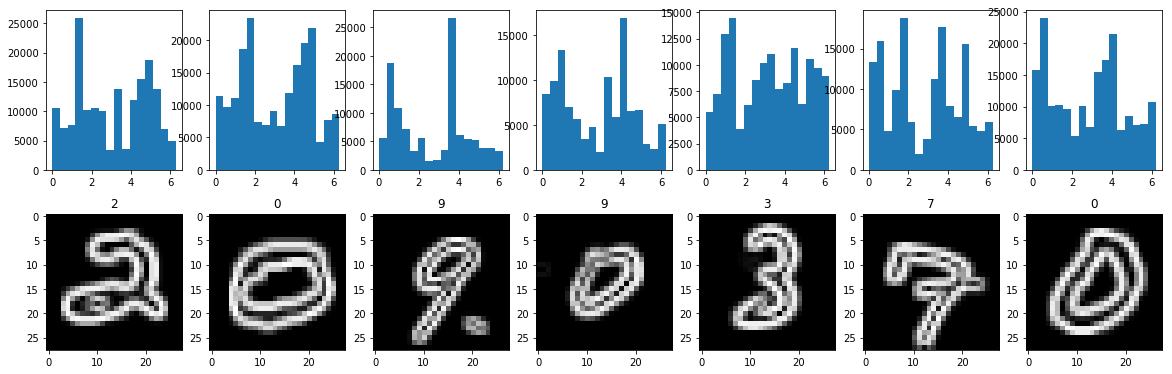

In [53]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_g[:7], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % predicted_test[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(test_theta[i - 1].flatten(), bins=16, weights=test_g[i - 1].flatten())

In [54]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(predicted_test, 1):
        dst.write('%s,%s\n' % (i, p))